# Case Studies
## 1 Function Definitions
* If given `x`, the functions will try to calculate the actual results.
* If not given `x`, the function will return the function in symbolic style.

In [2]:
from typing import List
import numpy as np
import sympy as sp
from sympy import Sum
from sympy.functions import log, exp


def ellipsoid(x: List[float] = None, alpha: int = 1000) -> float:
    if x is not None:
        d = len(x)
        return sum([np.power(alpha, (i - 1) / (d - 1)) * np.exp2(x[i - 1]) for i in range(1, d + 1)])
    else:
        i, d, alpha = sp.symbols('i d alpha')
        x = sp.IndexedBase('x')
        return Sum(alpha ** ((i - 1) / (d - 1)) * x[i] ** 2, (i, 1, d))
    

def rosenbrock_banana(x_1: float = None, x_2: float = None) -> float:
    if x_1 and x_2:
        return np.exp2(1 - x_1) + 100 * np.exp2(x_2 - np.power(x_1, 2))
    else:
        x_1, x_2 = sp.symbols('x_1 x_2')
        return (1 - x_1) ** 2 + 100 * (x_2 - x_1 ** 2) ** 2


def log_ellipsoid(x: List[float] = None, epsilon: float = 1e-4) -> float:
    if x is not None:
        return np.log(epsilon + ellipsoid(x))
    else:
        epsilon = sp.symbols('epsilon')
        return log(epsilon + ellipsoid())


def attractive_sector(x: List[float] = None, q: float = 1e4) -> float:
    try:
        if x is not None:
            d = len(x)
            # h = lambda x : np.log(1 + np.exp(q * x)) / q
            h = lambda x : (np.log(1 + np.exp(-abs(q * x))) + max(q * x, 0)) / q
            return sum([np.exp2(h(x[i - 1])) + 100 * np.exp2(h(x[i - 1])) for i in range(1, d + 1)])
        else:
            i, d, q = sp.symbols('i d q')
            h1, h2 = sp.symbols('h1 h2')
            x = sp.IndexedBase('x')
            return Sum(h1 ** 2 + 100 * h2 ** 2, (i, 1, d)).subs({h1: log(1 + exp(q * x[i])) / q, h2: log(1 + exp(q * - x[i])) / q })
    except:
        print("An error happened. The temporary x is {}.".format(x))


def sum_of_different_powers_function(x: List[float] = None) -> float:
    if x is not None:
        d = len(x)
        return sum([np.power(np.exp2(x[i - 1]), 1 + (i - 1) / (d - 1)) for i in range(1, d + 1)])
    else:
        i, d = sp.symbols('i d')
        x = sp.IndexedBase('x')
        return Sum((x[i] ** 2) ** (1 + (i - 1) / (d - 1)) , (i, 1, d))

## 2 Gradient
First Derivate
### 2.1 Definitons
* The reason that there is a `_` before parameters is because we need to distinguish between input parameters and symbols.
* If given `_x`, the functions will try to do first derivate in symbolic manner, and substitute the symbols with actual values after that.
* If not given `_x` but given `_d`, the functions will give the results of gradient in symbolic style.

In [3]:
def ellipsoid_first_derivate(_x: List[float] = None, _d: int = None, _alpha: int = 1000) -> float:
    i, d, alpha = sp.symbols('i d alpha')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [ellipsoid().subs({d: _d, alpha: _alpha}).doit().diff(x[i]) for i in range(1, _d + 1)]
    else:
        _d = len(_x)
        gradient = [0] * _d
        for i in range(_d):
            gradient[i] = ellipsoid().subs({d: _d, alpha: _alpha}).doit().diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)])
        return gradient

def rosenbrock_banana_first_derivate(_x_1: float = None, _x_2: float = None) -> float:
    x_1, x_2 = sp.symbols('x_1 x_2')
    gradient = [rosenbrock_banana().diff(x_1), rosenbrock_banana().diff(x_2)]
    if not (_x_1 and _x_2):
        return gradient
    else:
        return [g.subs({x_1: _x_1, x_2: _x_2}) for g in gradient]


def log_ellipsoid_first_derivate(_x: List[float] = None, _d: int = None, _epsilon: float = 1e-4) -> float:
    d, epsilon = sp.symbols('d epsilon')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [log_ellipsoid().subs({d: _d, epsilon: _epsilon}).doit().diff(x[i]) for i in range(1, _d + 1)]
    else:
        _d = len(_x)
        gradient = [0] * _d
        for i in range(_d):
            gradient[i] = log_ellipsoid().subs({d: _d, epsilon: _epsilon}).doit().diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)])
        return gradient


def attractive_sector_first_derivate(_x: List[float] = None, _d: int = None, _q: float = 1e4) -> float:
    i, d, q = sp.symbols('i d q')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [attractive_sector().subs({d: _d, q: _q}).doit().diff(x[i]) for i in range(1, _d + 1)]
    else:
        _d = len(_x)
        gradient = [0] * _d
        for i in range(_d):
            gradient[i] = attractive_sector().subs({d: _d, q: _q}).doit().diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)])
        return gradient


def sum_of_different_powers_function_first_derivate(_x: List[float] = None, _d: int = None) -> float:
    i, d = sp.symbols('i d')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [sum_of_different_powers_function().subs({d: _d}).doit().diff(x[i]) for i in range(1, _d + 1)]
    else:
        _d = len(_x)
        gradient = [0] * _d
        for i in range(_d):
            gradient[i] = sum_of_different_powers_function().subs({d: _d}).doit().diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)])
        return gradient

### 2.2 Demo

In [4]:
x_input = [1, 1, 1]
d_input = 3

In [5]:
ellipsoid()

Sum(alpha**((i - 1)/(d - 1))*x[i]**2, (i, 1, d))

In [6]:
print(ellipsoid(x=x_input))
print(ellipsoid_first_derivate(_d=d_input))
print(ellipsoid_first_derivate(_x=x_input))

2065.2455532033678
[2*x[1], 20*sqrt(10)*x[2], 2000*x[3]]
[0, 2, 20*sqrt(10)]


In [7]:
rosenbrock_banana()

(1 - x_1)**2 + 100*(-x_1**2 + x_2)**2

In [8]:
print(rosenbrock_banana(x_1=1, x_2=1))
print(rosenbrock_banana_first_derivate())
print(rosenbrock_banana_first_derivate(1, 1))

101.0
[-400*x_1*(-x_1**2 + x_2) + 2*x_1 - 2, -200*x_1**2 + 200*x_2]
[0, 0]


In [9]:
log_ellipsoid()

log(epsilon + Sum(alpha**((i - 1)/(d - 1))*x[i]**2, (i, 1, d)))

In [10]:
print(log_ellipsoid(x=x_input))
print(log_ellipsoid_first_derivate(_d=d_input))
print(log_ellipsoid_first_derivate(_x=x_input))

7.633004458708948
[2*x[1]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001), 2*sqrt(alpha)*x[2]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001), 2*alpha*x[3]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)]
[0, 2/(sqrt(alpha) + alpha + 1.0001), 2*sqrt(alpha)/(sqrt(alpha) + alpha + 1.0001)]


In [11]:
attractive_sector()

Sum(100*log(1 + exp(-q*x[i]))**2/q**2 + log(exp(q*x[i]) + 1)**2/q**2, (i, 1, d))

In [12]:
print(attractive_sector(x=x_input))
print(attractive_sector_first_derivate(_d=d_input))
print(attractive_sector_first_derivate(_x=x_input))

606.0
[0.0002*exp(10000.0*x[1])*log(exp(10000.0*x[1]) + 1)/(exp(10000.0*x[1]) + 1) - 0.02*exp(-10000.0*x[1])*log(1 + exp(-10000.0*x[1]))/(1 + exp(-10000.0*x[1])), 0.0002*exp(10000.0*x[2])*log(exp(10000.0*x[2]) + 1)/(exp(10000.0*x[2]) + 1) - 0.02*exp(-10000.0*x[2])*log(1 + exp(-10000.0*x[2]))/(1 + exp(-10000.0*x[2])), 0.0002*exp(10000.0*x[3])*log(exp(10000.0*x[3]) + 1)/(exp(10000.0*x[3]) + 1) - 0.02*exp(-10000.0*x[3])*log(1 + exp(-10000.0*x[3]))/(1 + exp(-10000.0*x[3]))]
[0, 2.00000000000000, 2.00000000000000]


In [13]:
sum_of_different_powers_function()

Sum((x[i]**2)**(1 + (i - 1)/(d - 1)), (i, 1, d))

In [14]:
print(sum_of_different_powers_function(x=x_input))
print(sum_of_different_powers_function_first_derivate(_d=d_input))
print(sum_of_different_powers_function_first_derivate(_x=x_input))

8.82842712474619
[2*x[1], 3*(x[2]**2)**(3/2)/x[2], 4*x[3]**3]
[0, 2, 3]


## 3 Hessian

* `fpd` stands for `first partial derivate`.

In [15]:
def ellipsoid_second_derivate(_x: List[float] = None, _d: int = None, _alpha: int = 1000) -> float:
    # i, d, alpha = sp.symbols('i d alpha')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [[fpd.diff(x[i]) for i in range(1, _d + 1)] for fpd in ellipsoid_first_derivate(_d=_d, _alpha=_alpha)]
    else:
        _d = len(_x)
        return [[fpd.diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)]) for i in range(1, _d + 1)] for fpd in ellipsoid_first_derivate(_d=_d, _alpha=_alpha)]

def rosenbrock_banana_second_derivate(_x_1: float = None, _x_2: float = None) -> float:
    x_1, x_2 = sp.symbols('x_1 x_2')
    if not (_x_1 and _x_2):
        # fpd = rosenbrock_banana_first_derivate()
        # return [[fpd[0].diff(x_1), fpd[0].diff(x_2)],
        #         [fpd[1].diff(x_1), fpd[1].diff(x_2)]]
        return [[fpd.diff(x_1), fpd.diff(x_2)] for fpd in rosenbrock_banana_first_derivate()]
    else:
        return [[fpd.diff(x_1).subs({x_1: _x_1, x_2: _x_2}), fpd.diff(x_2).subs({x_1: _x_1, x_2: _x_2})] for fpd in rosenbrock_banana_first_derivate()]


def log_ellipsoid_second_derivate(_x: List[float] = None, _d: int = None, _epsilon: float = 1e-4) -> float:
    # d, epsilon = sp.symbols('d epsilon')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [[fpd.diff(x[i]) for i in range(1, _d + 1)] for fpd in log_ellipsoid_first_derivate(_d=_d, _epsilon=_epsilon)]
    else:
        _d = len(_x)
        return [[fpd.diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)]) for i in range(1, _d + 1)] for fpd in log_ellipsoid_first_derivate(_d=_d, _epsilon=_epsilon)]


def attractive_sector_second_derivate(_x: List[float] = None, _d: int = None, _q: float = 1e4) -> float:
    # i, d, q = sp.symbols('i d q')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [[fpd.diff(x[i]) for i in range(1, _d + 1)] for fpd in attractive_sector_first_derivate(_d=_d, _q=_q)]
    else:
        _d = len(_x)
        return [[fpd.diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)]) for i in range(1, _d + 1)] for fpd in attractive_sector_first_derivate(_d=_d, _q=_q)]


def sum_of_different_powers_function_second_derivate(_x: List[float] = None, _d: int = None) -> float:
    # i, d = sp.symbols('i d')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [[fpd.diff(x[i]) for i in range(1, _d + 1)] for fpd in sum_of_different_powers_function_first_derivate(_d=_d)]
    else:
        _d = len(_x)
        return [[fpd.diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)]) for i in range(1, _d + 1)] for fpd in sum_of_different_powers_function_first_derivate(_d=_d)]

### 3.1 Demo

In [16]:
print(ellipsoid_second_derivate(_d=d_input))
print(ellipsoid_second_derivate(_x=x_input))

[[2, 0, 0], [0, 20*sqrt(10), 0], [0, 0, 2000]]
[[2, 0, 0], [0, 20*sqrt(10), 0], [0, 0, 2000]]


In [17]:
print(rosenbrock_banana_second_derivate())
print(rosenbrock_banana_second_derivate(_x_1=1, _x_2=1))

[[1200*x_1**2 - 400*x_2 + 2, -400*x_1], [-400*x_1, 200]]
[[802, -400], [-400, 200]]


In [18]:
print(log_ellipsoid_second_derivate(_d=d_input))
print(log_ellipsoid_second_derivate(_x=x_input))

[[2/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001) - 4*x[1]**2/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, -4*sqrt(alpha)*x[1]*x[2]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, -4*alpha*x[1]*x[3]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2], [-4*sqrt(alpha)*x[1]*x[2]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, 2*sqrt(alpha)/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001) - 4*alpha*x[2]**2/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, -4*alpha**(3/2)*x[2]*x[3]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2], [-4*alpha*x[1]*x[3]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, -4*alpha**(3/2)*x[2]*x[3]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, -4*alpha**2*x[3]**2/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2 + 2*alpha/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)]]
[[2/(sqrt(alpha) + alpha + 1.0001) - 3.999200119984/(0.99

In [19]:
print(attractive_sector_second_derivate(_d=d_input))
print(attractive_sector_second_derivate(_x=x_input))

[[2.0*exp(10000.0*x[1])*log(exp(10000.0*x[1]) + 1)/(exp(10000.0*x[1]) + 1) - 2.0*exp(20000.0*x[1])*log(exp(10000.0*x[1]) + 1)/(exp(10000.0*x[1]) + 1)**2 + 2.0*exp(20000.0*x[1])/(exp(10000.0*x[1]) + 1)**2 + 200.0*exp(-10000.0*x[1])*log(1 + exp(-10000.0*x[1]))/(1 + exp(-10000.0*x[1])) - 200.0*exp(-20000.0*x[1])*log(1 + exp(-10000.0*x[1]))/(1 + exp(-10000.0*x[1]))**2 + 200.0*exp(-20000.0*x[1])/(1 + exp(-10000.0*x[1]))**2, 0, 0], [0, 2.0*exp(10000.0*x[2])*log(exp(10000.0*x[2]) + 1)/(exp(10000.0*x[2]) + 1) - 2.0*exp(20000.0*x[2])*log(exp(10000.0*x[2]) + 1)/(exp(10000.0*x[2]) + 1)**2 + 2.0*exp(20000.0*x[2])/(exp(10000.0*x[2]) + 1)**2 + 200.0*exp(-10000.0*x[2])*log(1 + exp(-10000.0*x[2]))/(1 + exp(-10000.0*x[2])) - 200.0*exp(-20000.0*x[2])*log(1 + exp(-10000.0*x[2]))/(1 + exp(-10000.0*x[2]))**2 + 200.0*exp(-20000.0*x[2])/(1 + exp(-10000.0*x[2]))**2, 0], [0, 0, 2.0*exp(10000.0*x[3])*log(exp(10000.0*x[3]) + 1)/(exp(10000.0*x[3]) + 1) - 2.0*exp(20000.0*x[3])*log(exp(10000.0*x[3]) + 1)/(exp(10000

In [20]:
print(sum_of_different_powers_function_second_derivate(_d=d_input))
print(sum_of_different_powers_function_second_derivate(_x=x_input))

[[2, 0, 0], [0, 6*(x[2]**2)**(3/2)/x[2]**2, 0], [0, 0, 12*x[3]**2]]
[[2, 0, 0], [0, 6, 0], [0, 0, 12]]


## 4 Numeric Computation
Before we use `sympy` to perform symbolic computation, and here we try to use numeric computation to verify the results.

## 5 Plot

In [21]:
import matplotlib.pyplot as plt

def my_plot_3d(func, start=-10, end=10):
    x = np.linspace(start, end, 100)
    y = np.linspace(start, end, 100)
    X, Y = np.meshgrid(x, y)
    n = len(X)
    Z = np.array([[0] * n for _ in range(n)])
    for i in range(n):
        for j in range(n):
            Z[i][j] = func([x[i], y[j]])

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    # ax.contour3D(X, Y, Z, 50)
    # ax.plot_wireframe(X, Y, Z)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

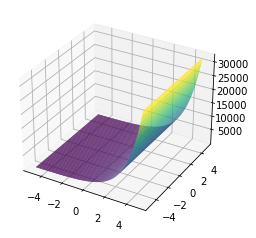

In [35]:
my_plot_3d(ellipsoid, start=-5, end=5)

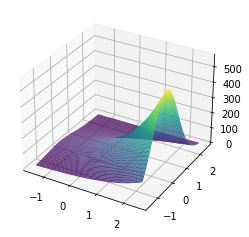

In [29]:
def plot_rosenbrock_banana(start=-1.5, end=2.5):
    x = np.linspace(start, end, 100)
    y = np.linspace(start, end, 100)
    X, Y = np.meshgrid(x, y)
    n = len(X)
    Z = np.array([[0] * n for _ in range(n)])
    for i in range(n):
        for j in range(n):
            Z[i][j] = rosenbrock_banana(x_1=x[i], x_2=y[j])

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    # ax.contour3D(X, Y, Z, 50)
    # ax.plot_wireframe(X, Y, Z)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

plot_rosenbrock_banana()

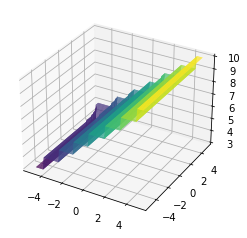

In [34]:
my_plot_3d(log_ellipsoid, start=-5, end=5)

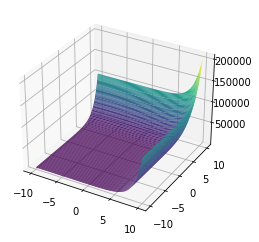

In [ ]:
my_plot_3d(attractive_sector)

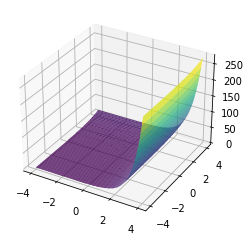

In [33]:
my_plot_3d(sum_of_different_powers_function, start=-4, end=4)